## Введение в анализ данных, ИАД-2

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №2

Задание выполнил(а): _(впишите свои фамилию и имя)_

### Общая информация

__Дата выдачи:__ 04.03.2019

__Дедлайн:__ 23:59 17.03.2019

### Оценивание и штрафы

Оценка за ДЗ вычисляется по следующей формуле:

$$
\text{points} \times 10 / \text{max points},
$$

где points — количество баллов, которое вы набрали, max_points - максимальное число баллов за задание. Бонусные задания отмечены звездочками (*)

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).


# kNN своими руками (4)

Реализуйте взвешенный алгоритм kNN для регрессии. Пусть нам нужно вычислить значение $y$ для некоторого $x$ при известных данных $\left(x_1, y_1\right), \ldots, \left(x_\ell, y_\ell\right)$. Предсказанием вашего регрессора будет являться

$$
\hat{y} = \frac{\sum\limits_{i=1}^kw_iy_{(i)}}{\sum\limits_{i=1}^kw_i},
$$
где $\left(x_{(1)}, y_{(1)}\right), \ldots, \left(x_{(k)}, y_{(k)}\right)$ - ближайшие $k$ объектов к $x$ по некоторой метрике $d(\cdot, \cdot)$, а $w_i = \frac{1}{d\left(x, x_{(i)}\right)}$. Ваш алгоритм должен уметь работать с двумя метриками:

$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_2 = \sqrt{\sum\limits_{j=1}^n\left(x_{(i)}^j - x^j\right)^2}\qquad\text{(евклидова)}
$$
$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_1 = \sum\limits_{j=1}^n\left|x_{(i)}^j - x^j\right|\qquad\text{(манхэттена)}
$$

Сверьте для нескольких комбинаций различных параметров свой результат на искусственной выборке с результатом соответствующего алгоритма из `sklearn` по метрике качества MSE.

In [1]:
import math

class KNN:
    def __init__(self, metric='euclid', k=5):
        """
        PARAMETERS:
        metric ('euclid' or 'manhattan')
        k - number of nearest neighbors
        """
        
        self.metric = metric
        self.k = k
        
        self.X_train = None
        self.y_train = None
        
    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (l, d)
        y_train - np.array of shape (l,)
        """
        self.X_train = X_train
        self.y_train = y_train
        return self
    
    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        y_pred = []
        for i in X_test:
            neighbours = []
            for j in self.X_train:
                if self.metric == 'euclid':
                    neighbours.append(math.sqrt(np.sum( (j - i) ** 2 )))
                else:
                    temp = (j - i) ** 2
                    temp = temp ** 0.5
                    neighbours.append(np.sum(temp))
            index = np.argsort(neighbours)[:self.k]
            top = 0
            bottom = 0
            for t in index:
                top += y_train[t] / neighbours[t]
                bottom += 1 / neighbours[t]
            y_pred.append(top / bottom)
        
        return(np.array(y_pred))

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

np.random.seed(17032019)
X_train = np.random.randn(1000, 50)
y_train = np.random.randn(1000,)
X_test = np.random.randn(500, 50)
y_test = np.random.randn(500,)

# Количество соседей 5, евклидова метрика
knn = KNN()
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [4]:
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform')
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [5]:
predictions = knn.predict(X_test)
mean_squared_error(y_test, predictions)

1.143019350619603

In [6]:
mean_squared_error(y_test, pred)

1.143364989935662

In [7]:
knn = KNN(k=10)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [8]:
knn = KNeighborsRegressor(n_neighbors=10, weights='uniform')
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [9]:
predictions = knn.predict(X_test)
mean_squared_error(y_test, predictions)

1.0756506817802374

In [10]:
mean_squared_error(y_test, pred)

1.0752895532072482

In [11]:
knn = KNN(k=20)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [12]:
knn = KNeighborsRegressor(n_neighbors=20, weights='uniform')
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                    weights='uniform')

In [13]:
predictions = knn.predict(X_test)
mean_squared_error(y_test, predictions)

1.067792530738678

In [14]:
mean_squared_error(y_test, pred)

1.0668191451763116

In [15]:
knn = KNN(k=5, metric='manhattan')
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [16]:
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform', p=1)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                    weights='uniform')

In [17]:
predictions = knn.predict(X_test)
mean_squared_error(y_test, predictions)

1.1781020576821544

In [18]:
mean_squared_error(y_test, pred)

1.1768254941187883

In [19]:
knn = KNN(k=10, metric='manhattan')
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [20]:
knn = KNeighborsRegressor(n_neighbors=10, weights='uniform', p=1)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=1,
                    weights='uniform')

In [21]:
predictions = knn.predict(X_test)
mean_squared_error(y_test, predictions)

1.0676400678193927

In [22]:
mean_squared_error(y_test, pred)

1.0674709632118555

In [23]:
knn = KNN(k=20, metric='manhattan')
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [24]:
knn = KNeighborsRegressor(n_neighbors=20, weights='uniform', p=1)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=20, p=1,
                    weights='uniform')

In [25]:
predictions = knn.predict(X_test)
mean_squared_error(y_test, predictions)

1.0623705017176985

In [26]:
mean_squared_error(y_test, pred)

1.0612315724977766

In [ ]:
# your code here
# Значениея ошибки схожи с алгоритмо из sklearn для евклидовой и манхеттенской метрик с 5, 10 и 20 соседями

# Линейная регрессия своими руками (4)

Реализуйте линейную регрессию с градиентным спуском для [функции потерь Хьюбера](https://en.wikipedia.org/wiki/Huber_loss):

$$
L_\delta\left(y, \hat{y}\right) =
\begin{cases}
\frac{1}{2}\left(y - \hat{y}\right)^2, \qquad &|y - \hat{y}| \leq \delta\\
\delta\left|y - \hat{y}\right| - \frac{1}{2}\delta^2,\qquad & \text{otherwise}
\end{cases}
$$

В таком случае общее значение функции потерь на всем датасете $(x_1, y_1), \ldots, (x_\ell, y_\ell)$ будет равно

$$
L = \frac{1}{\ell}\sum\limits_{i=1}^\ell L_\delta\left(y_i, \hat{y}_i\right)
$$

Проверьте работу вашего метода: выведите результаты его работы на той же искусственной выборке, что и в задаче выше (в качестве метрик качества используйте MSE и Huber loss). Постройте график зависимости значения функции потерь от итерации градиентного спуска.

*Вы можете опустить единичный признак в модели и не добавлять его в данные. Для данной искусственной выборки это не актуально, потому что целевая переменная в этом случае является случайной величиной из стандартного нормального распределения со средним 0.*

*Вектор весов в градиентном спуске можете инициализировать нулями.*

In [109]:

class LinearRegressionHuber:
    def __init__(self, delta=1.0, max_iter=1000, tol=1e-6, eta=0.005):
        """
        PARAMETERS:
        delta - scalar in Huber loss
        max_iter - maximum possible number of iterations in Gradient Descent
        tol - precision for stopping criterion in Gradient Descent
        eta - step size in Gradient Descent
        """
        
        self.delta = delta
        self.max_iter = max_iter
        self.tol = tol
        self.eta = eta
        
        self.w = None
        self.loss_history = None
        
    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (l, d)
        y_train - np.array of shape (l,)
        """
        self.loss_history = []
        self.w = np.zeros((X_train.shape[1], 1))
        for i in range(self.max_iter):
            w_grad = self.calc_gradient(X_train, y_train)
            if np.linalg.norm(w_grad) < self.tol:
                return self.w, self.loss_history
            else:
                self.w -= self.eta * w_grad
                self.loss_history.append(self.calc_loss(X_train, y_train))
        return self.w, self.loss_history
        
    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        return X_test @ self.w
    
    def calc_gradient(self, X, y):
        """
        Calculates the gradient of Huber loss by weights.
        
        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)
        
        OUTPUT:
        grad - np.array of shape (d,)
        """
        grad = np.zeros((X.shape[1], 1))
        for i in range(X.shape[0]):
            dif = X[i] @ self.w - y[i]
            if -self.delta <= dif[0] <= self.delta:
                grad += X[i].reshape(X.shape[1], 1) * dif[0]
            elif dif[0] > 0:
                grad += X[i].reshape(X.shape[1], 1) * self.delta * 1
            elif dif[0] < 0:
                grad += X[i].reshape(X.shape[1], 1) * self.delta * -1
        return grad / X.shape[0]
    
    def calc_loss(self, X, y):
        """
        Calculates the Huber loss.
        
        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)
        
        OUTPUT:
        loss - float
        """
        loss = 0
        for i in range(X.shape[0]):
            dif = X[i] @ self.w - y[i]
            if -self.delta <= dif[0] <= self.delta:
                loss += (dif[0] ** 2) / 2
            else:
                loss += abs(dif[0]) * self.delta - self.delta ** 2 / 2
        return loss / X.shape[0]

In [110]:
X_scaled = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
lr = LinearRegressionHuber()
tr = lr.fit(X_scaled, y_train)

In [111]:
from sklearn.linear_model import LinearRegression 
lr1 = LinearRegression(fit_intercept=False)
lr1.fit(X_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [112]:
X_tscaled = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)
a = lr1.predict(X_tscaled)

In [113]:
b = lr.predict(X_tscaled).reshape(1,500)[0]

In [114]:
n = mean_squared_error(y_test, a)
m = mean_squared_error(y_test, b)
print(n, m, n - m)

1.083464188672432 1.083953574701372 -0.0004893860289398866


Text(0.5, 0, 'Step')

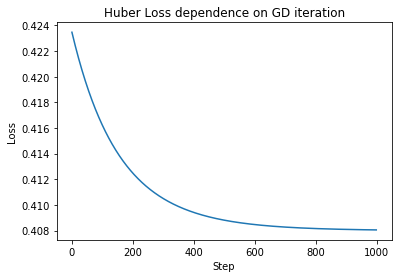

In [126]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(tr[1])
plt.title('Huber Loss dependence on GD iteration')
plt.ylabel('Loss')
plt.xlabel('Step')

In [123]:
def huber_loss(y, y1):
    loss = 0
    delta = 1
    for i in range(y.shape[0]):
        dif = y[i] - y1[i]
        if -delta <= dif <= delta:
            loss += (dif ** 2) / 2
        else:
            loss += abs(dif) * delta - delta ** 2 / 2
    return loss / y.shape[0]

huber_loss(a, y_test)

0.4505648155245234

In [124]:
huber_loss(b, y_test)

0.44994893974160904

In [ ]:
# your code here

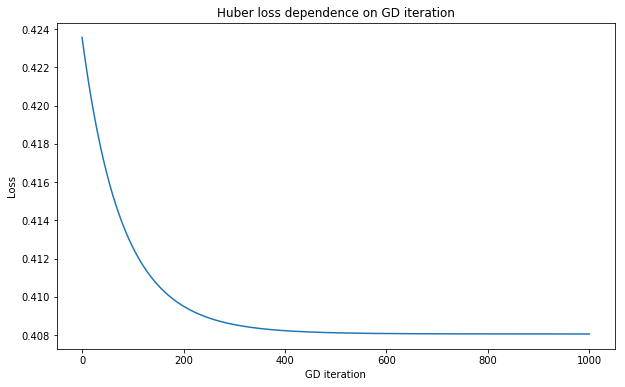

In [372]:
# your code here

# Практика

Пожалуйста, при использовании различных функций из библиотек импортируйте все, что вам понадобилось в данной части, в следующем блоке:

In [248]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, f_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures

%matplotlib inline

В этом домашнем задании вы поработаете с данными из другого соревнования на Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques. Задача - предсказание цены дома.

In [249]:
data = pd.read_csv('train.csv', header=0)

In [250]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [251]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [252]:
data.drop('Id', axis=1, inplace=True)

## 1 (1)

Есть ли в данных пропуски? Если да, то для каждого столбца, в котором они имеются, посчитайте их количество и их долю от общего числа значений. Что вы наблюдаете?

In [253]:
# your code here
# Посчитаем долю неизвестных значений в признаках от общего числа
data.isnull().sum() / data.shape[0]
# Пропуски в данных есть, в некоторых столбцах почти нет данных, в одном признаке только половина. 
# Можно удалить такие столбцы.

MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
                   ...   
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
KitchenQual      0.000000
TotRmsAbvGrd     0.000000
Functional       0.000000
Fireplaces       0.000000
FireplaceQu      0.472603
GarageType  

In [254]:
data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [255]:
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].mean())

In [256]:
data['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [257]:
data['MasVnrType'] = data['MasVnrType'].fillna('None')

In [258]:
data['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([885.,  54.,  79.,  59.,  71.,  55.,  48.,  45.,  34.,  22.,  19.,
         19.,   9.,   4.,   9.,   7.,   9.,   1.,   2.,   7.,   1.,   2.,
          1.,   2.,   1.,   1.,   1.,   1.,   1.,   1.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([   0.,   40.,   80.,  120.,  160.,  200.,  240.,  280.,  320.,
         360.,  400.,  440.,  480.,  520.,  560.,  600.,  640.,  680.,
         720.,  760.,  800.,  840.,  880.,  920.,  960., 1000., 1040.,
        1080., 1120., 1160., 1200., 1240., 1280., 1320., 1360., 1400.,
        1440., 1480., 1520., 1560., 1600.]),
 <a list of 40 Patch objects>)

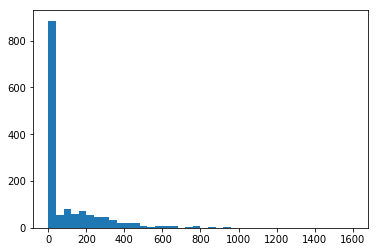

In [259]:
plt.hist(data['MasVnrArea'], bins=40)

In [260]:
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].mean())

In [261]:
data['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [262]:
data['BsmtQual'] = data['BsmtQual'].fillna('TA')

In [263]:
data['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [264]:
data['BsmtCond'] = data['BsmtCond'].fillna('TA')

In [265]:
data['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [266]:
data['GarageType'] = data['GarageType'].fillna('Attchd')

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  3.,  0.,  0.,  2.,
         2.,  5.,  0.,  2.,  0., 14.,  3.,  8.,  3., 10.,  6.,  1.,  4.,
         2.,  8.,  4.,  3.,  3.,  4.,  5.,  2.,  3.,  9., 14., 10.,  2.,
         0.,  4.,  4.,  2., 11.,  8., 24.,  6.,  3., 12., 19., 29., 20.,
        21., 17., 19., 13., 21., 16., 18., 21., 36., 26., 15., 20., 13.,
        14., 14., 18.,  9., 29., 54., 15., 15., 10.,  4.,  7.,  8., 10.,
         6., 11., 24., 16.,  9., 13., 22., 18., 18., 20., 19., 31., 57.,
        20., 26., 50., 53., 65., 59., 49., 29., 24.]),
 array([1900. , 1901.1, 1902.2, 1903.3, 1904.4, 1905.5, 1906.6, 1907.7,
        1908.8, 1909.9, 1911. , 1912.1, 1913.2, 1914.3, 1915.4, 1916.5,
        1917.6, 1918.7, 1919.8, 1920.9, 1922. , 1923.1, 1924.2, 1925.3,
        1926.4, 1927.5, 1928.6, 1929.7, 1930.8, 1931.9, 1933. , 1934.1,
        1935.2, 1936.3, 1937.4, 1938.5, 1939.6, 1940.7, 1941.8, 1942.9,
        1944. , 1945.1, 1946.2, 1947.3, 1948.4, 1949.5, 1950.6, 1951.7,
  

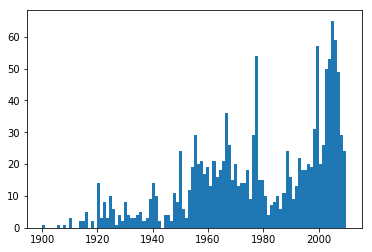

In [267]:
plt.hist(data['GarageYrBlt'], bins=100)

In [268]:
data['GarageYrBlt'].median()

1980.0

In [269]:
data['GarageYrBlt'].mean()

1978.5061638868744

In [270]:
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['GarageYrBlt'].median())

In [271]:
data['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [272]:
data['GarageFinish'] = data['GarageFinish'].fillna('Unf')

In [273]:
data['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [274]:
data['GarageQual'] = data['GarageQual'].fillna('TA')

In [275]:
data['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [276]:
data['GarageCond'] = data['GarageCond'].fillna('TA')

In [277]:
data.iloc[:,30:45].isnull().sum() / data.shape[0]

BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinSF1      0.000000
BsmtFinType2    0.026027
BsmtFinSF2      0.000000
BsmtUnfSF       0.000000
TotalBsmtSF     0.000000
Heating         0.000000
HeatingQC       0.000000
CentralAir      0.000000
Electrical      0.000685
1stFlrSF        0.000000
2ndFlrSF        0.000000
LowQualFinSF    0.000000
GrLivArea       0.000000
dtype: float64

In [278]:
data['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [279]:
data['BsmtExposure'] = data['BsmtExposure'].fillna('No')

In [280]:
data['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [281]:
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('Unf')

In [282]:
data['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [283]:
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('Unf')

In [284]:
data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [285]:
data['Electrical'] = data['Electrical'].fillna('SBrkr')

In [286]:
data.isnull().any().any()

False

In [ ]:
# В неудаленных столбцах пропусков не более 6%. Нечисловые признаки можно заполнить модой, 
# а чиловые - средним или медианой, смотря как распределен признак. В случае с GarageYrBlt можно выбрать медиану, 
# на гистограмме она ближе к моде, можно также сказать, что чем больше год, тем больше гаражей было построено, хотя это
# и грубая оценка, тогда заполнение медианой подходит лучше, т.к. ее значение больше среднего значения.

## 2 (1)

Избавьтесь от пропусков. Для каждого из примененных методов обоснуйте свое решение. **Проверьте, что вы действительно избавились от пропусков.**

*Напоминание. В зависимости от типа столбца, можно заполнить пропуски, например, средним арифметическим, медианой, модой, можно какими-то отдельными значениями. А можно такие столбцы вообще удалить.*

In [ ]:
# your code here

## 3 (1)

Обработайте категориальные признаки. В их обнаружении вам может помочь синтаксис `pandas` (например, можно обратить внимание на типы столбцов), а также описание датасета и его исследование. Объясните выбор метода (one-hot-encoding, label encoding, ...)

In [287]:
# Выберем категориальные признаки и закодируем методом ohe, иначе модель может решить, что данные находятся в каком-то
# порядке
cat_features_mask = (data.dtypes == "object").values
data_dum = pd.get_dummies(data, drop_first=True)
print(data_dum.shape)
data_dum.head()

(1460, 233)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


## 4 (0.5)

Вычислите и визуализируйте попарную корреляцию Пирсона между всеми признаками. Какие выводы можно сделать?

*Для визуализации можно использовать `seaborn.heatmap()`.*

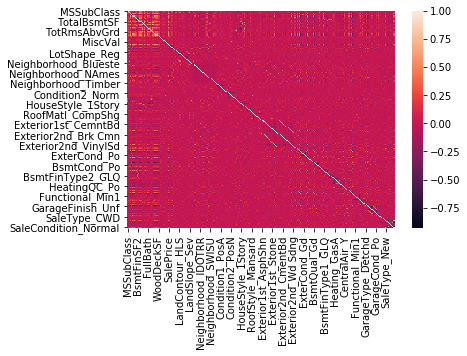

In [288]:
# your code here
corr = data_dum.corr(method='pearson')
sns.heatmap(corr)
# Судя по графику, между отдельными признаками корреляция чаще всего слабая, хотя в некоторых местах ее абсолютное
# значение больше 0.5. По диагонали корреляция равна 1, т.к. она рассчитывается между двумя одинаковыми столбцами.

## 5 (0.5)

Найдите признаки с максимальным и минимальным **абсолютным** значением коэффициента корреляции Пирсона с предсказываемым значением. Изобразите на графиках зависимость найденных признаков от предсказываемого значения.

*Не забудьте указать название графика и обозначить, что изображено по каждой из осей.*

In [289]:
# your code here
corr_price = (corr['SalePrice'] >= 0).astype('int')
corr_price[corr_price == 0] = -1
corr['SalePrice'] = corr['SalePrice'] * corr_price
corr_price_sorted = corr.sort_values('SalePrice')
corr_price_sorted[-2:-1]['SalePrice']
# Берем предпоследнюю строку, т.к. в последней строке считается корреляция между SalePrice и SalePrice, 
# она всегда равна 1 и не несет дополнительной информации.

OverallQual    0.790982
Name: SalePrice, dtype: float64

In [290]:
corr_price_sorted[:1]['SalePrice']

BsmtFinType2_GLQ    0.000076
Name: SalePrice, dtype: float64

Text(0, 0.5, 'BsmtFinType2_GLQ')

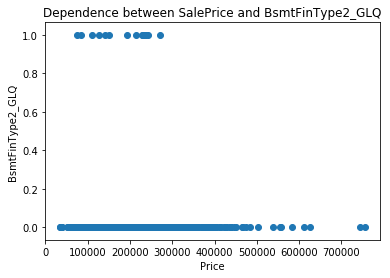

In [291]:
plt.scatter(data_dum['SalePrice'], data_dum['BsmtFinType2_GLQ'])
plt.title('Dependence between SalePrice and BsmtFinType2_GLQ')
plt.xlabel('Price')
plt.ylabel('BsmtFinType2_GLQ')

Text(0, 0.5, 'OverallQual')

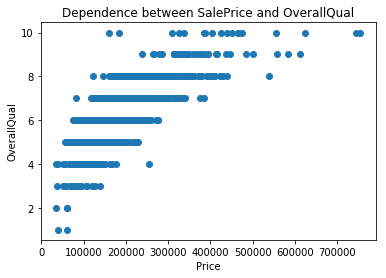

In [292]:
plt.scatter(data_dum['SalePrice'], data_dum['OverallQual'])
plt.title('Dependence between SalePrice and OverallQual')
plt.xlabel('Price')
plt.ylabel('OverallQual')

## 6 (0.5)

Постройте гистограмму распределения предсказываемого значения. Для избавления от разницы в масштабах, а также «смещения» распределения переменной в сторону нормального (что бывает полезно при статистическом анализе), можно прологарифмировать ее (это обратимое преобразование, поэтому целевую переменную легко восстановить). В данном случае воспользуйтесь `numpy.log1p`, чтобы сделать преобразование $y \to \ln\left(1 + y\right)$. Постройте гистограмму распределения от нового предсказываемого значения. Опишите наблюдения.

*В дальнейшем используйте в качестве предсказываемого значения вектор, который получился после логарифмирования.*

(array([ 11.,  38.,  99., 232., 273., 218., 176., 104.,  93.,  58.,  42.,
         35.,  24.,  10.,  17.,   8.,   7.,   4.,   2.,   1.,   1.,   2.,
          1.,   0.,   2.,   0.,   0.,   0.,   0.,   2.]),
 array([ 34900.        ,  58903.33333333,  82906.66666667, 106910.        ,
        130913.33333333, 154916.66666667, 178920.        , 202923.33333333,
        226926.66666667, 250930.        , 274933.33333333, 298936.66666667,
        322940.        , 346943.33333333, 370946.66666667, 394950.        ,
        418953.33333333, 442956.66666667, 466960.        , 490963.33333333,
        514966.66666667, 538970.        , 562973.33333333, 586976.66666667,
        610980.        , 634983.33333333, 658986.66666667, 682990.        ,
        706993.33333333, 730996.66666667, 755000.        ]),
 <a list of 30 Patch objects>)

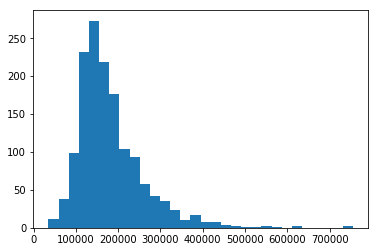

In [293]:
# your code here
plt.hist(data_dum['SalePrice'], bins=30)

(array([  3.,   2.,   0.,   0.,   4.,   5.,   6.,   4.,  19.,  36.,  33.,
         56., 105., 135., 190., 141., 172., 131.,  97.,  95.,  79.,  42.,
         46.,  22.,  18.,   9.,   2.,   4.,   2.,   2.]),
 array([2.43888634, 2.44680757, 2.45472881, 2.46265004, 2.47057128,
        2.47849251, 2.48641374, 2.49433498, 2.50225621, 2.51017745,
        2.51809868, 2.52601992, 2.53394115, 2.54186238, 2.54978362,
        2.55770485, 2.56562609, 2.57354732, 2.58146856, 2.58938979,
        2.59731103, 2.60523226, 2.61315349, 2.62107473, 2.62899596,
        2.6369172 , 2.64483843, 2.65275967, 2.6606809 , 2.66860213,
        2.67652337]),
 <a list of 30 Patch objects>)

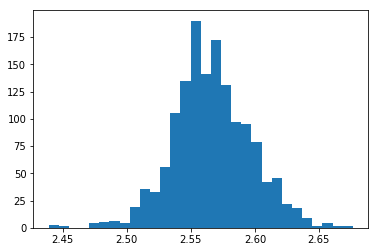

In [295]:
data_dum['SalePrice'] = np.log1p(data_dum['SalePrice'])
plt.hist(data_dum['SalePrice'], bins=30)

Text(0, 0.5, 'OverallQual')

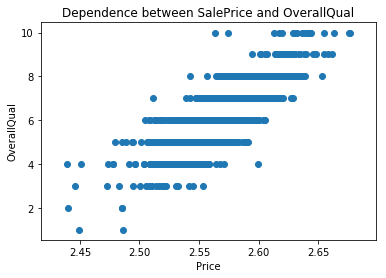

In [296]:
plt.scatter(data_dum['SalePrice'], data_dum['OverallQual'])
plt.title('Dependence between SalePrice and OverallQual')
plt.xlabel('Price')
plt.ylabel('OverallQual')

In [ ]:
# После логарифмирования распределение приблизилось к нормальному, а зависимость между SalePrice и OverallQual
# стала близка к линейной.

In [297]:
df = data_dum.copy()
df.drop('SalePrice', axis=1, inplace=True)
df.shape

(1460, 232)

Перейдем непосредственно к построению моделей. Разобьем выборку на обучение и контроль.

*Пожалуйста, **не меняйте** значение `random_state` в следующей ячейке.*

In [298]:
X_train, X_val, y_train, y_val = train_test_split(df, data_dum['SalePrice'], random_state=17032019)

In [299]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1095, 232), (365, 232), (1095,), (365,))

## 7 (2)

Примените к данным следующие алгоритмы:

- kNN
- линейная регрессия
- Lasso
- Ridge

Для каждого из методов подберите гиперпараметры с помощью кросс-валидации. Обучите алгоритмы с лучшими гиперпараметрами на обучающей выборке и оцените качество по метрике **Root** Mean Squared Error. Какой из методов показывает себя лучше?

In [300]:
# your code here
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [301]:
knn_predict = knn.predict(X_val)

In [302]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [303]:
lr_predict = lr.predict(X_val)

In [304]:
lss = Lasso()
lss.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [305]:
lss_predict = lss.predict(X_val)

In [306]:
rdg = Ridge()
rdg.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [307]:
rdg_predict = rdg.predict(X_val)

In [328]:
np.sqrt(mean_squared_error(lss_predict, y_val))

0.01800027428450793

In [310]:
np.sqrt(mean_squared_error(knn_predict, y_val))

0.017002831968291006

In [311]:
np.sqrt(mean_squared_error(lr_predict, y_val))

0.014226625390956085

In [312]:
np.sqrt(mean_squared_error(rdg_predict, y_val))

0.010803921400143081

In [313]:
rg = RidgeCV()
rg.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [314]:
rg_pred = rg.predict(X_val)
np.sqrt(mean_squared_error(rg_pred, y_val))

0.010221966063606727

In [315]:
ls = LassoCV()
ls.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [316]:
ls_pred = ls.predict(X_val)
np.sqrt(mean_squared_error(ls_pred, y_val))

0.014294521037542307

## 8 (1)

Постройте гистограммы значений весов для линейной регрессии, Lasso и Ridge. Опишите наблюдения. В чем различия между полученными наборами весов и почему?

Text(0.5, 1.0, 'Linear Regression coefs')

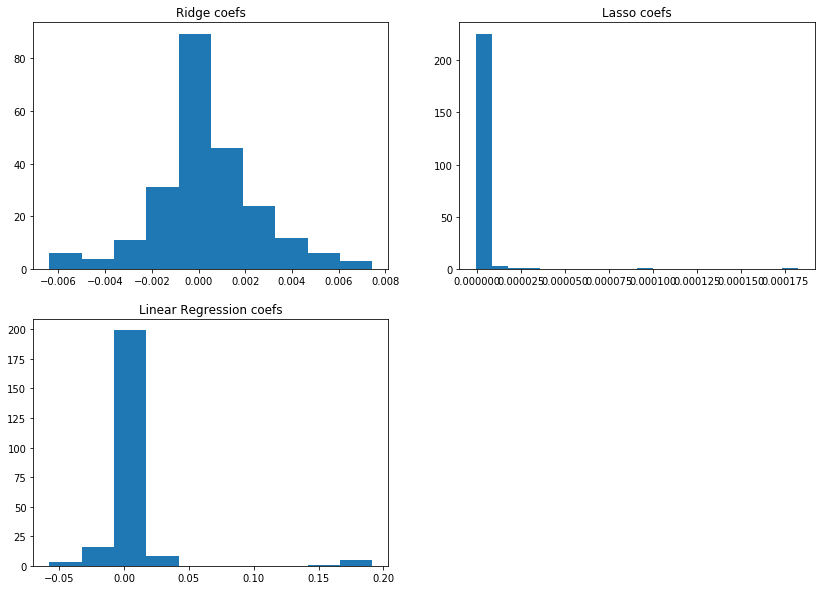

In [325]:
# your code here
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
plt.hist(rg.coef_)
plt.title('Ridge coefs')
plt.subplot(2, 2, 2)
plt.hist(ls.coef_, bins=20)
plt.title('Lasso coefs')
plt.subplot(2, 2, 3)
plt.hist(lr.coef_)
plt.title('Linear Regression coefs')

## 9 (0.5)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.125 на тестовых данных по метрике RMSE (если вы дошли до этого задания, а качество выше уже удовлетворяет этому условию, вы автоматически получите за него полный балл).

## 10* (0.5)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.121 на тестовых данных по метрике RMSE. Для этого вы можете использовать самые разные методы, какие захотите - отбор признаков, генерация новых, разные способы предобработки данных. Единственное ограничение - не использовать никакие алгоритмы регрессии, кроме kNN, линейной регрессии, Lasso и Ridge.

In [ ]:
# your code here

# Теория

За данную часть можно получить бонусные баллы. Решения необходимо оформить в этом же файле в ячейках типа Markdown, пользуясь $\LaTeX$ для записи математических формул.

## 1* (0.5)

Найдите константу $C$, решающую следующую задачу ($0 < \tau < 1$ фиксировано):

$$
\sum\limits_{i=1}^\ell\rho_\tau\left(y_i - C\right) \to \min_C,
$$

где

$$
\rho_\tau(z) =
\begin{cases}
\tau z, & z > 0\\
(\tau - 1)z, & z \leq 0
\end{cases}
$$

*(your solution here)*